# Telecom Churn Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay

In [5]:
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [6]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis

### Count of Target Class

<Axes: xlabel='Churn', ylabel='count'>

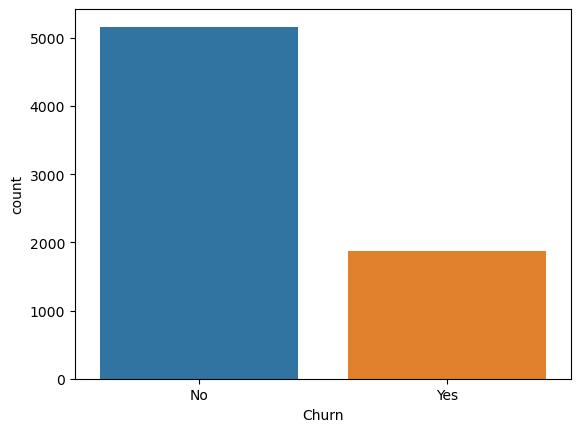

In [11]:
sns.countplot(x='Churn', data=df)

### Distribution of TotalCharges between Churn Categories

<Axes: xlabel='Churn', ylabel='TotalCharges'>

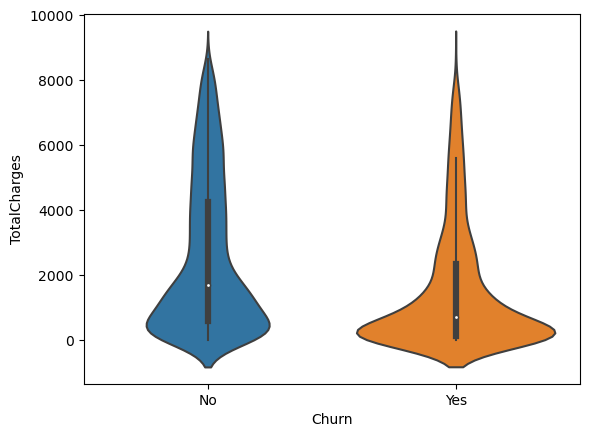

In [12]:
sns.violinplot(x='Churn', y='TotalCharges', data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

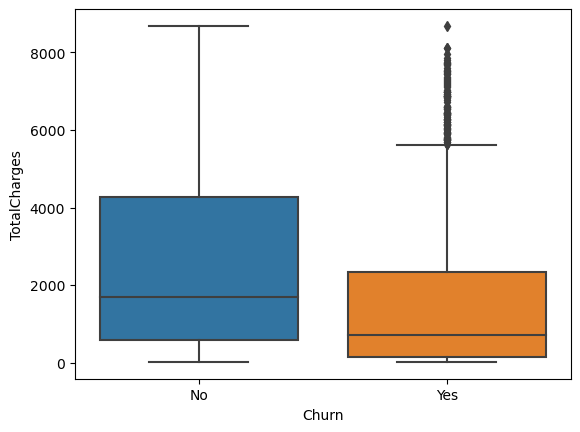

In [13]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

### Boxplot showing the distribution of TotalCharges per Contact type

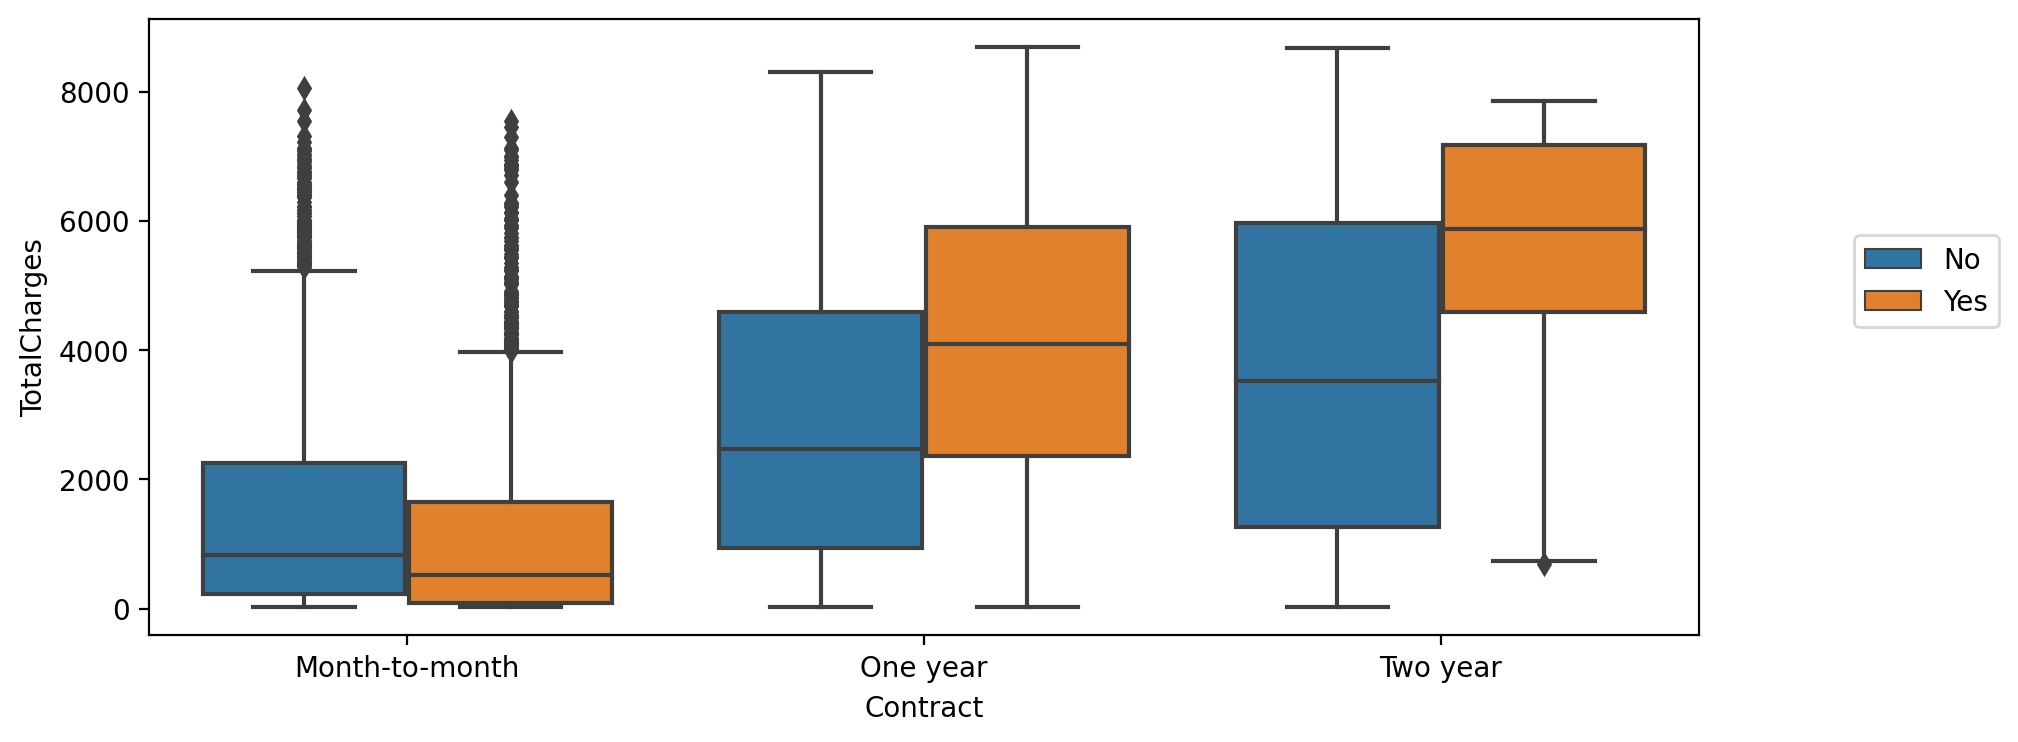

In [14]:
plt.figure(figsize=(10, 4), dpi=200)
sns.boxplot(x='Contract', y='TotalCharges', data=df, hue='Churn')
plt.legend(loc=(1.1, 0.5))

### Bar Plot Showing Correlation

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
'PaperlessBilling', 'PaymentMethod']

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']])

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [17]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [18]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

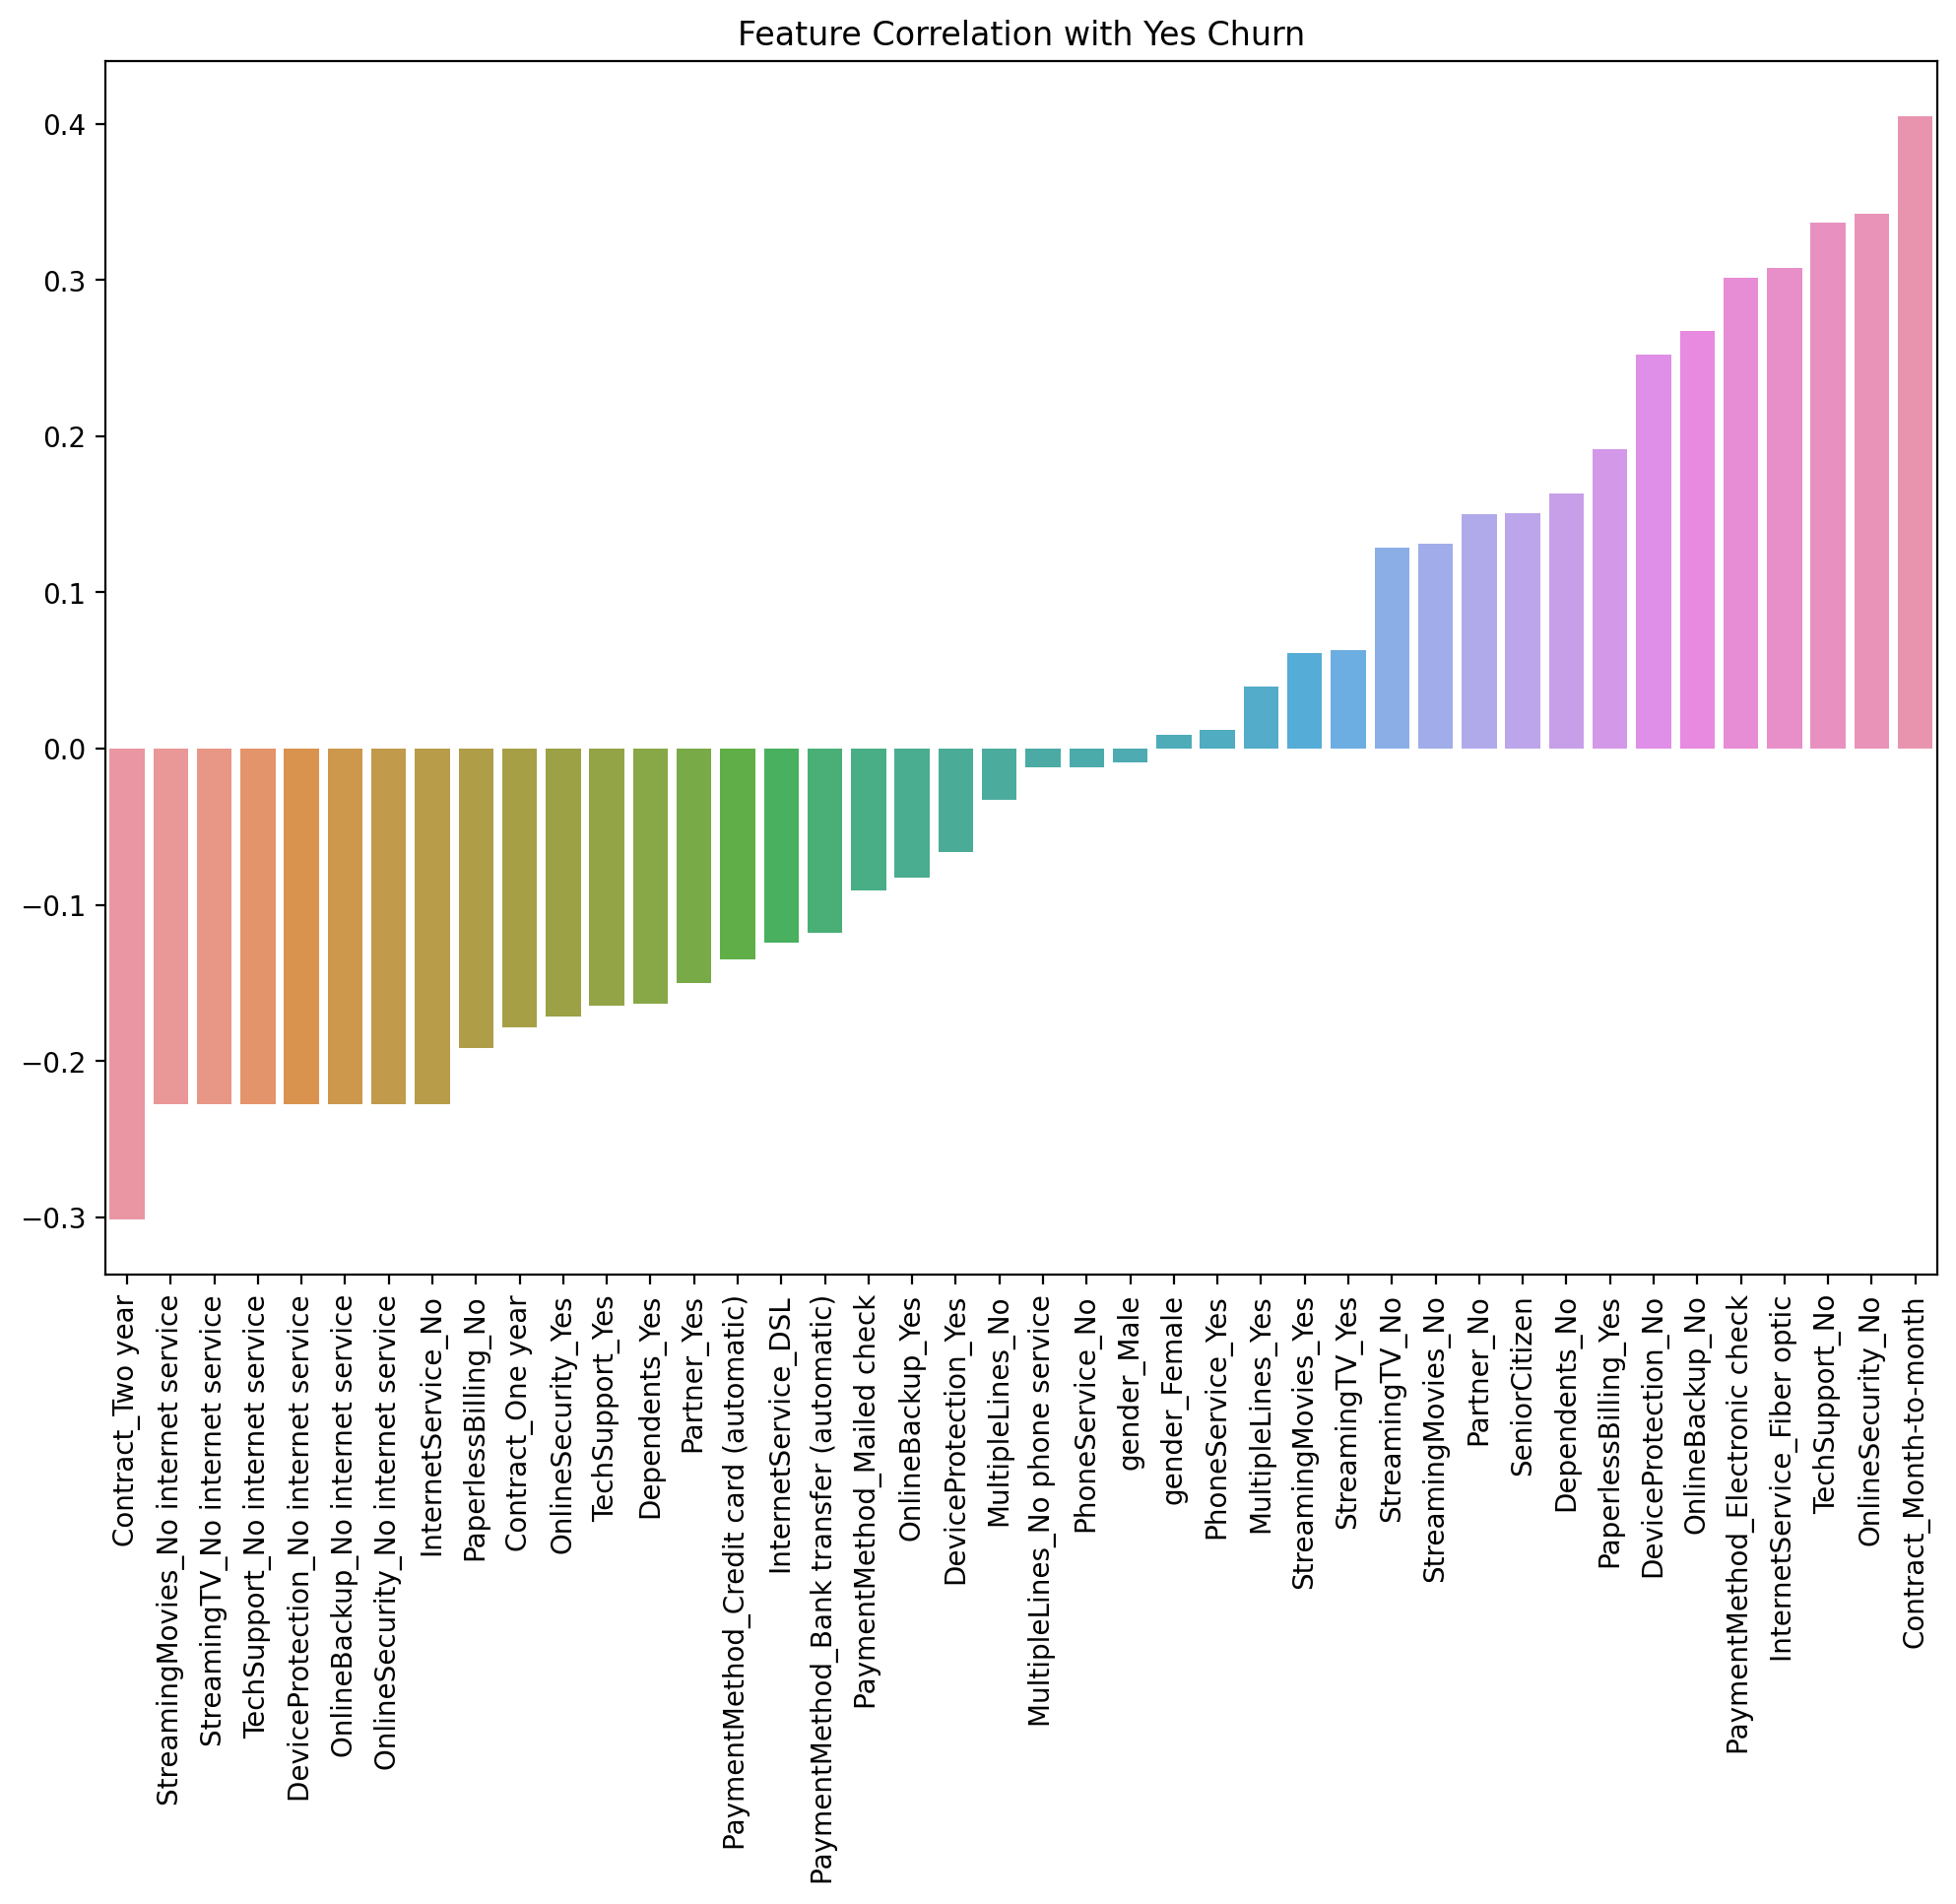

In [19]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.title("Feature Correlation with Yes Churn")
plt.xticks(rotation=90);

In [20]:
corr_no_churn = corr_df['Churn_No'].sort_values().iloc[1:-1]

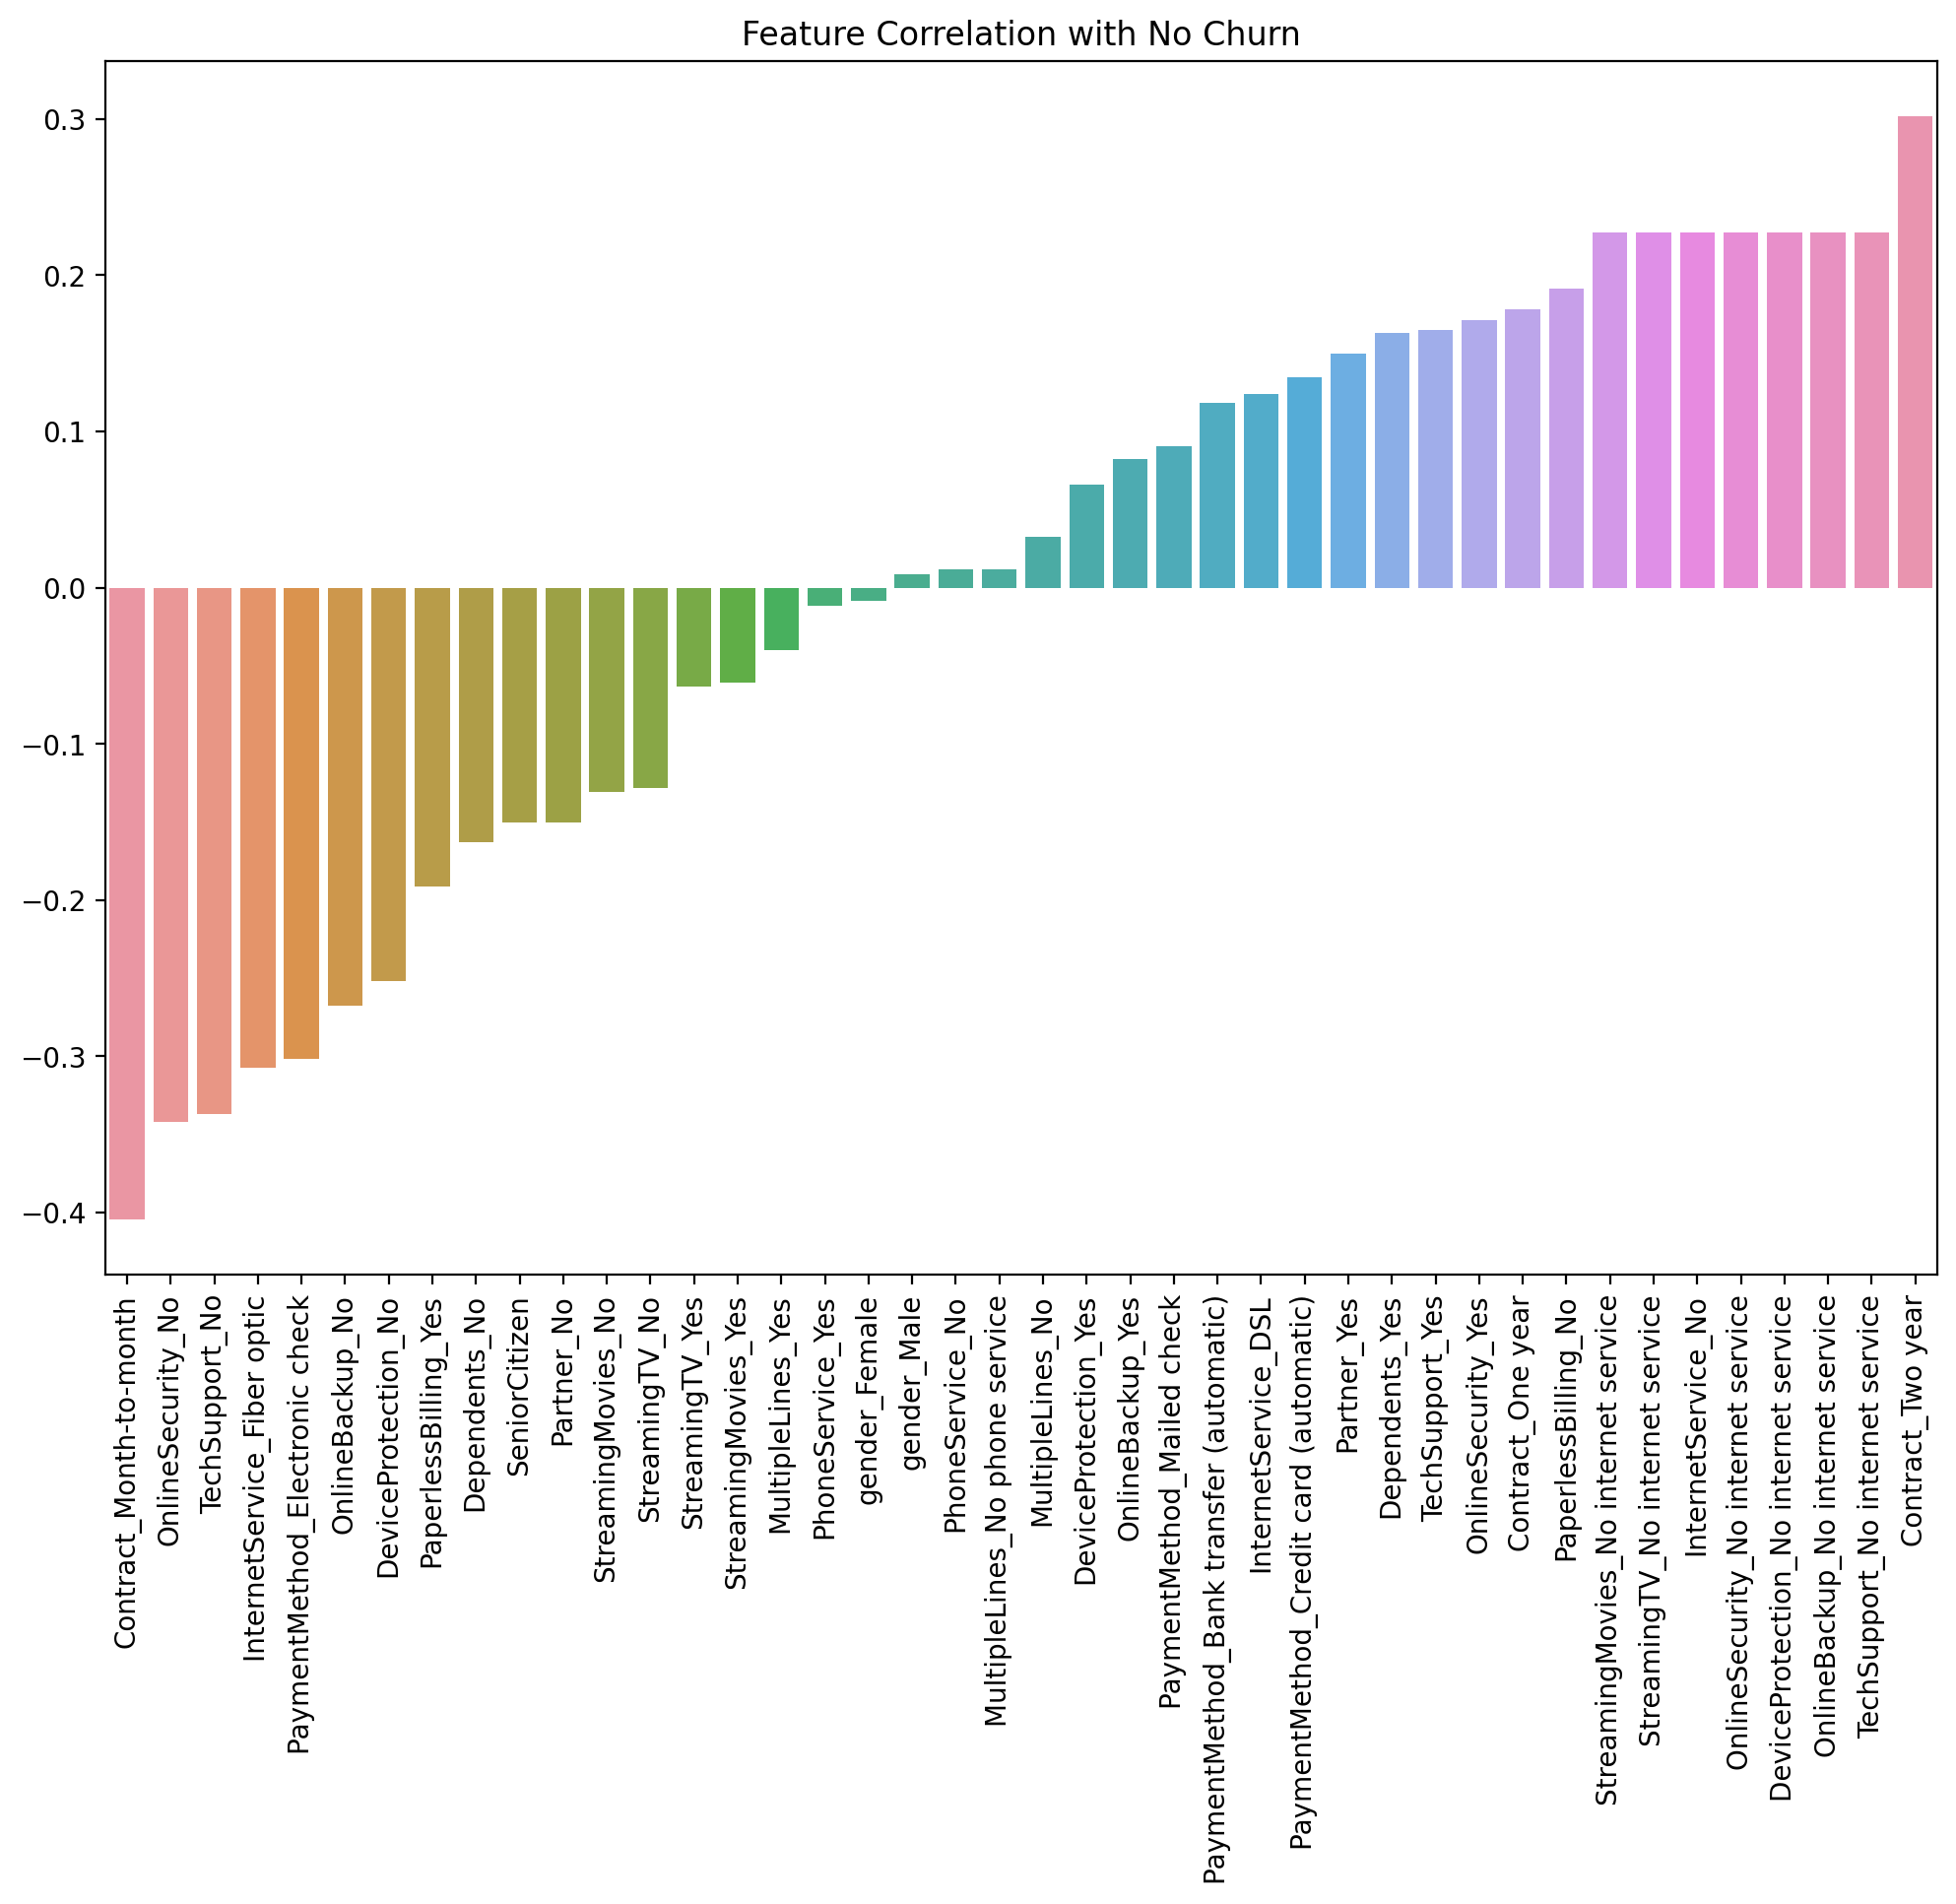

In [21]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=corr_no_churn.index, y=corr_no_churn.values)
plt.title("Feature Correlation with No Churn")
plt.xticks(rotation=90);

## Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

### Type of contracts

In [22]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### Histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.

<Axes: xlabel='tenure', ylabel='Count'>

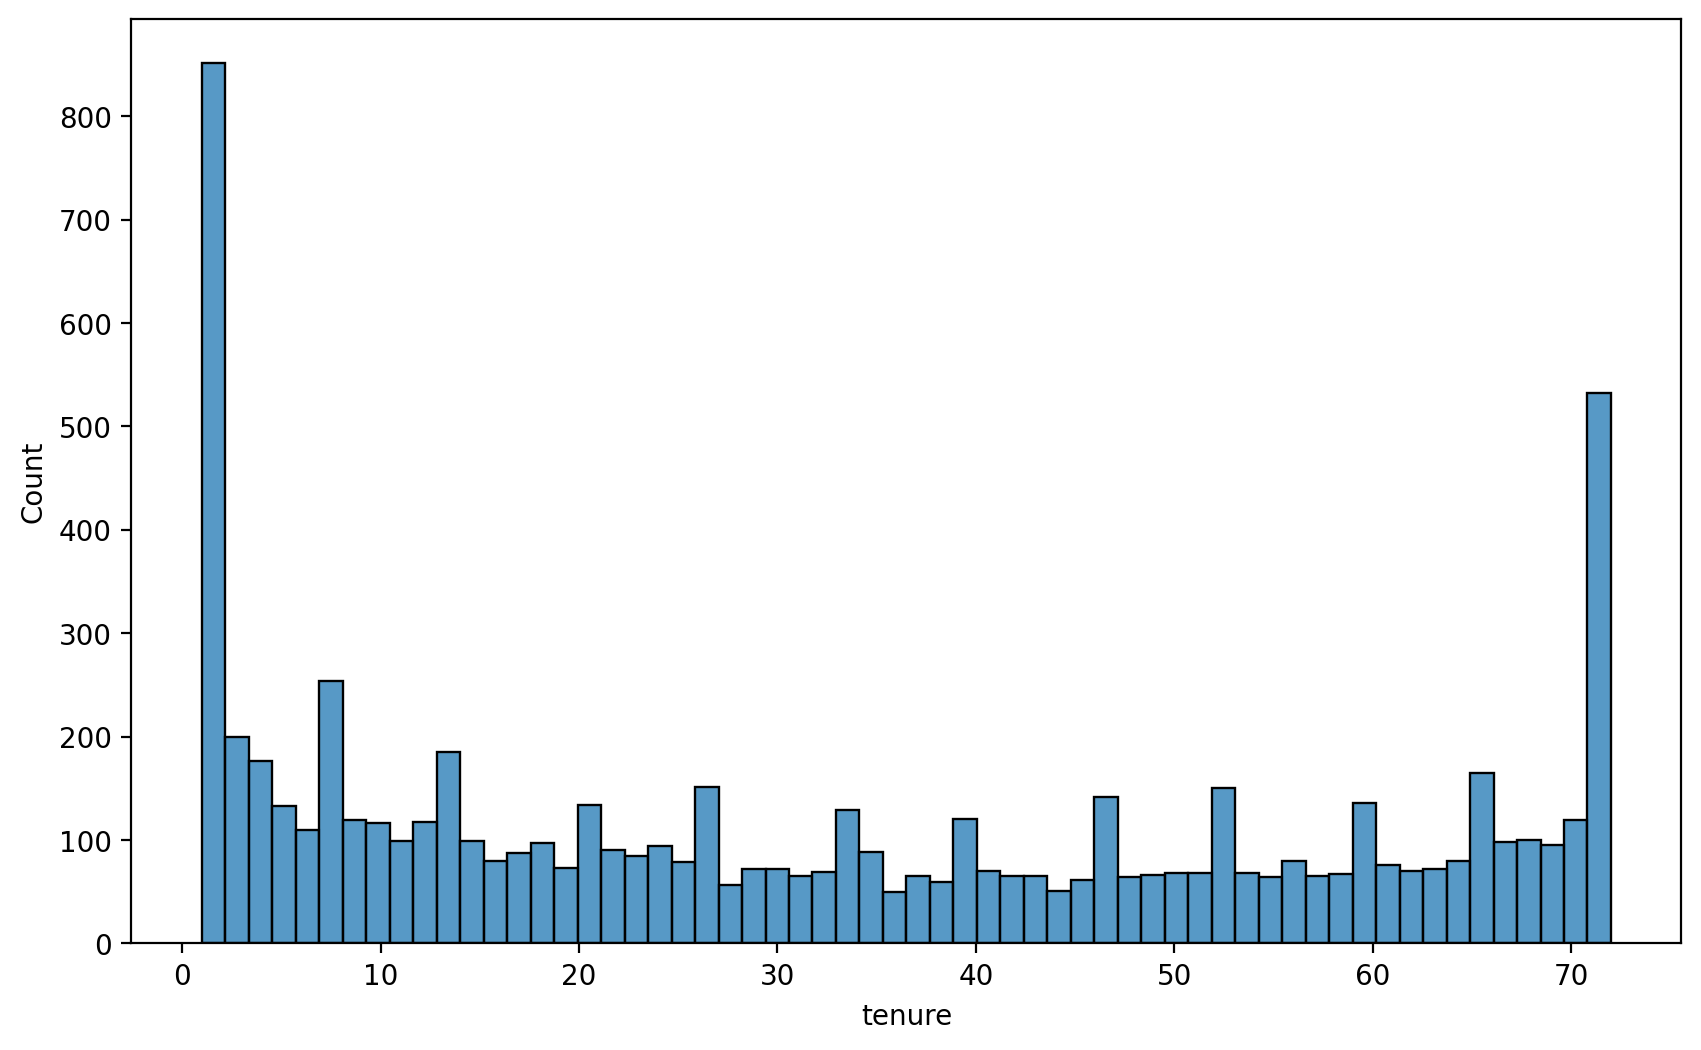

In [23]:
plt.figure(figsize=(10,6), dpi=200)
sns.histplot(x='tenure', data=df, bins=60)

### Histograms separated by two additional features, Churn and Contract.

<Figure size 2400x1600 with 0 Axes>

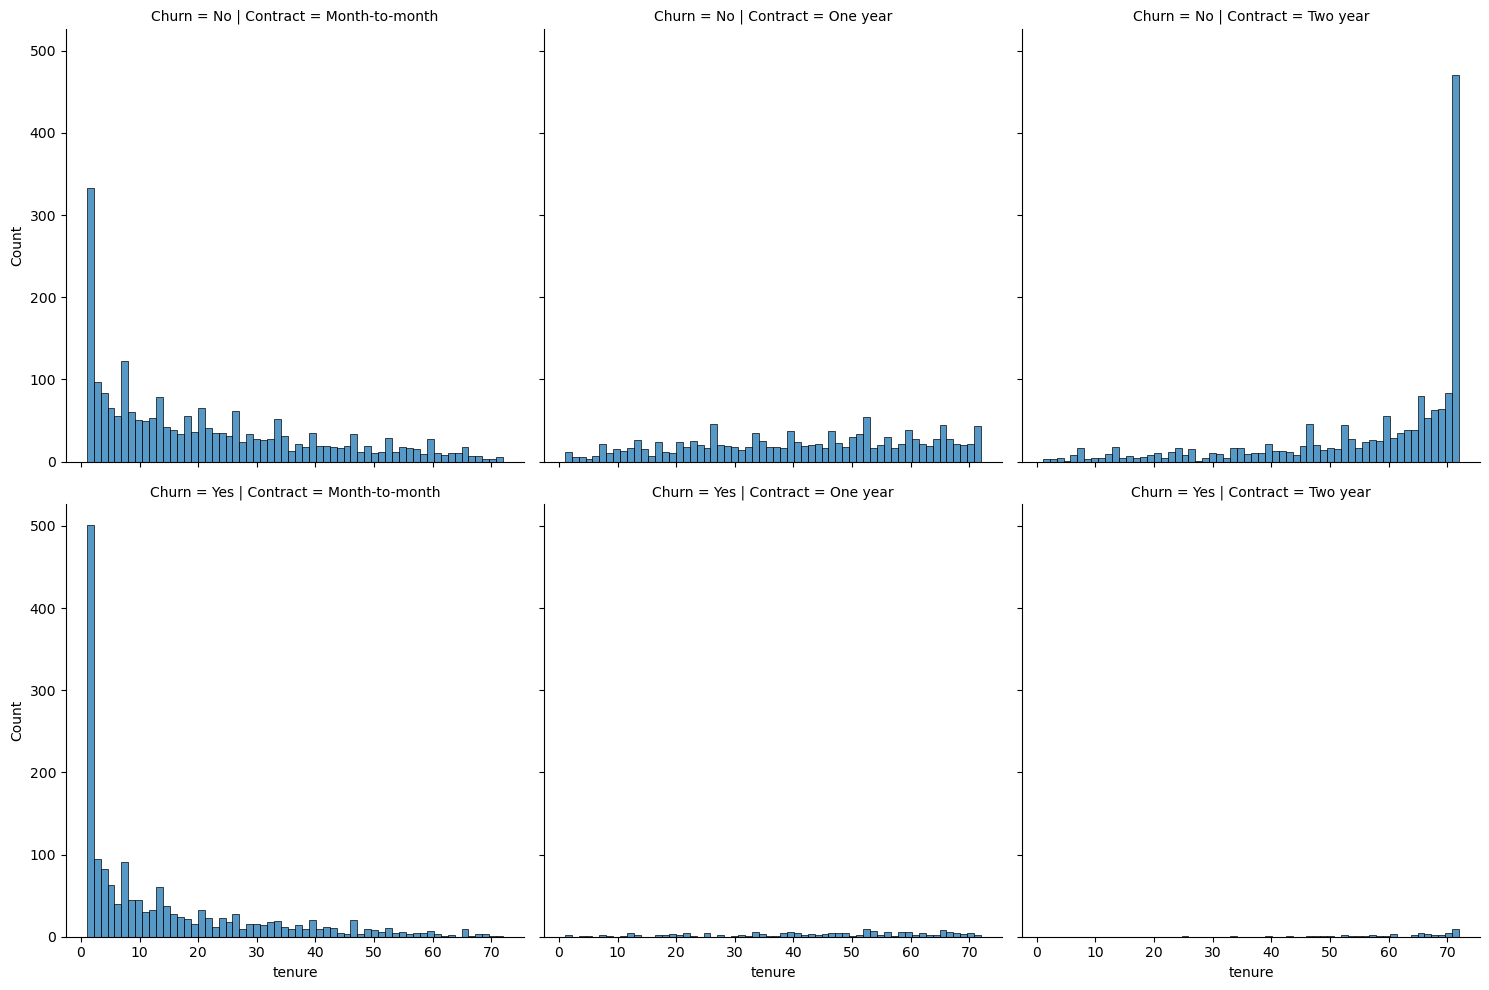

In [24]:
plt.figure(figsize=(12,8), dpi=200)
sns.displot(x='tenure', data=df, bins=60, col='Contract', row='Churn')

### Scatter plot of Total Charges versus Monthly Charges

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

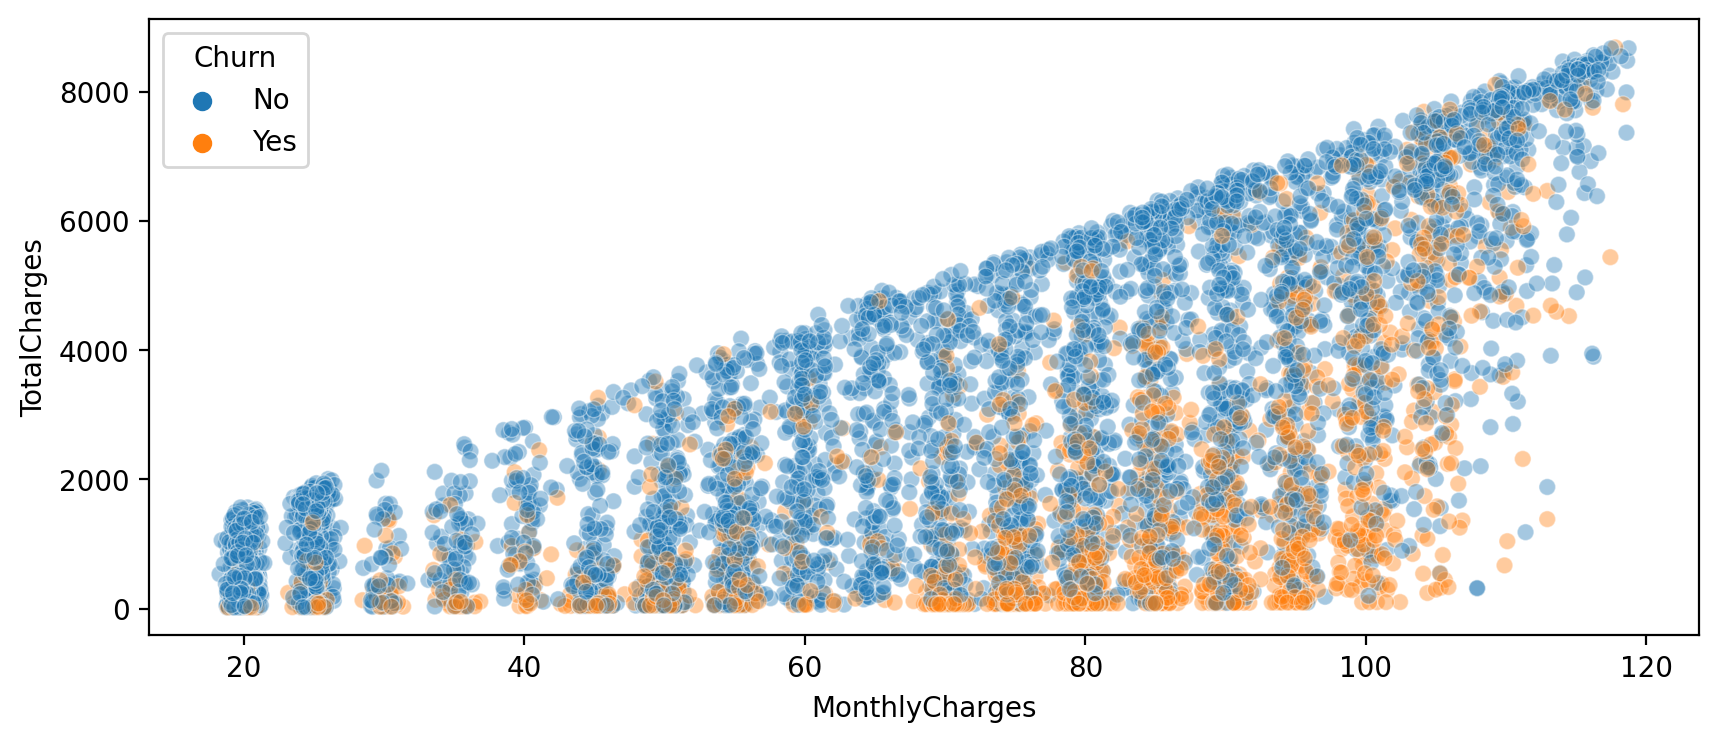

In [26]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn', alpha=0.4)

### Creating Cohorts based on Tenure

**Treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [27]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [28]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [29]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [30]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

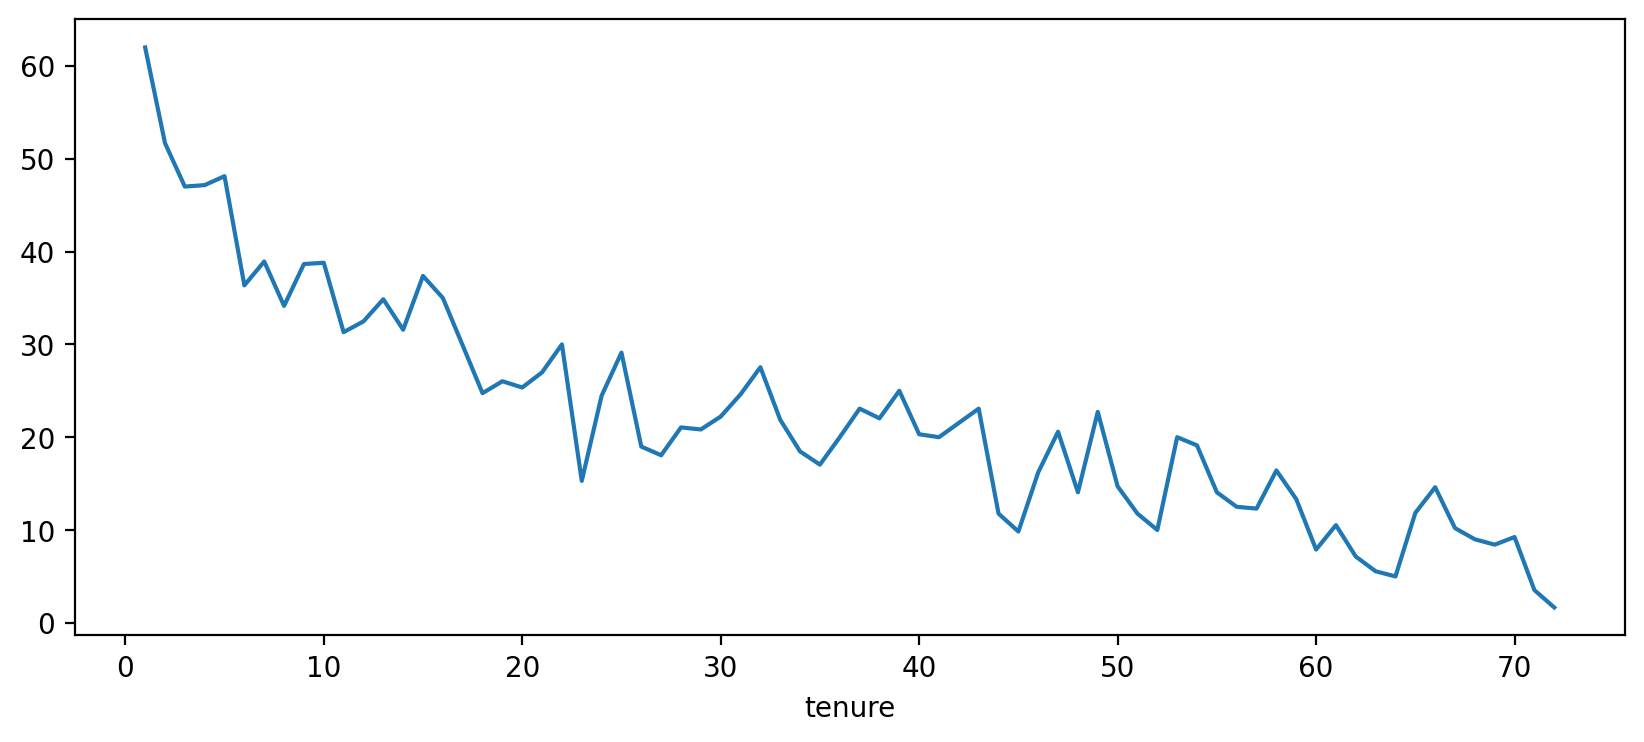

In [31]:
plt.figure(figsize=(10,4), dpi=200)
churn_rate.transpose()['customerID'].plot()

### Broader Cohort Groups

**Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'  

In [32]:
def cohort(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif (tenure > 12) and (tenure <= 24) :
        return '12-24 Months'
    elif (tenure > 24) and (tenure <= 48):
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [33]:
df['Tenure_cohort'] = df['tenure'].apply(cohort)

In [34]:
df[['Tenure_cohort', 'tenure']]

,Tenure_cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


### Scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

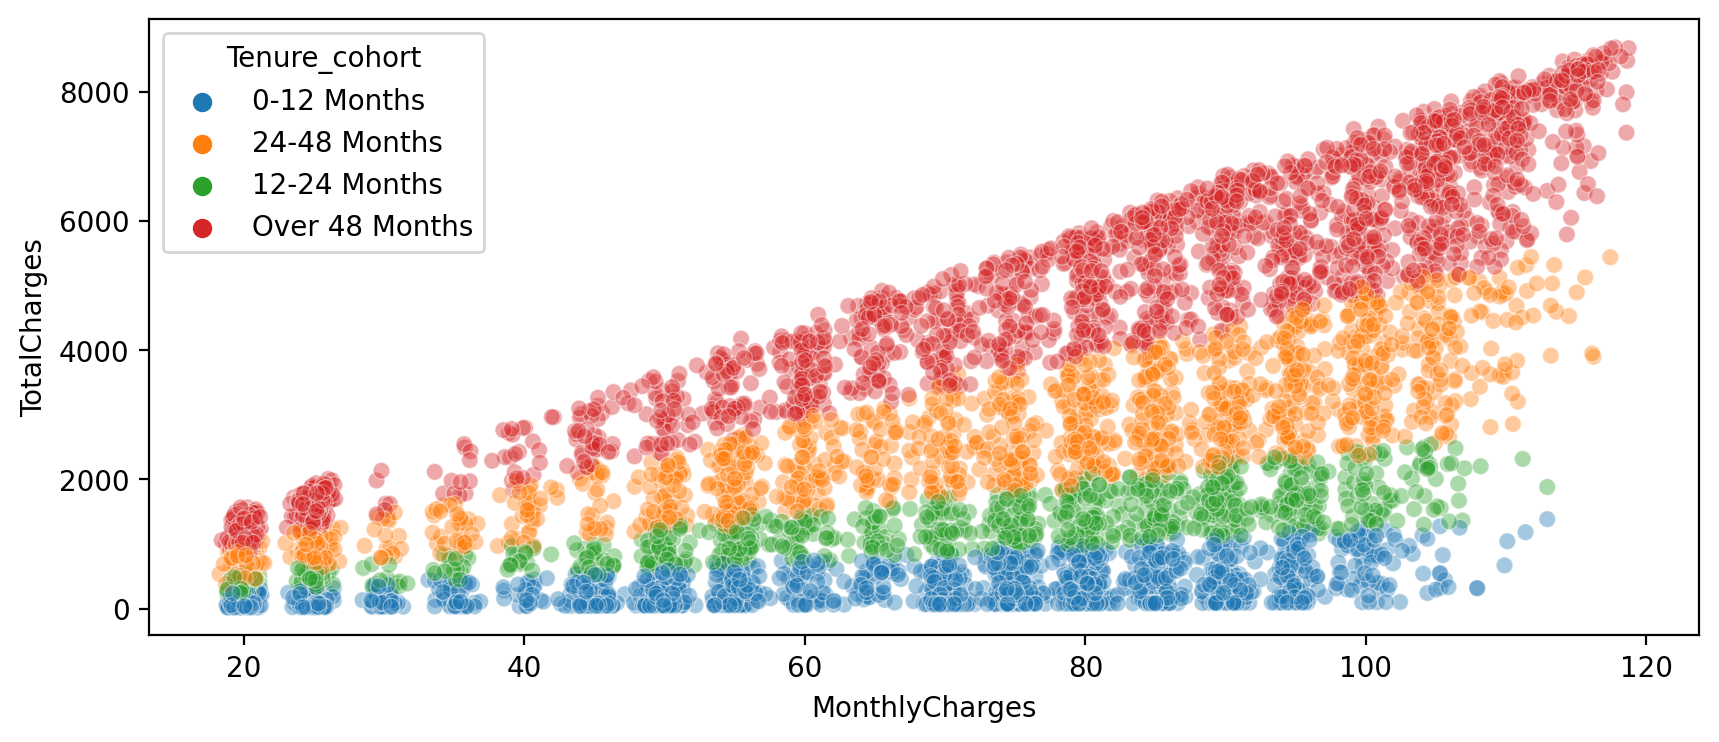

In [35]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Tenure_cohort', alpha=0.4)

### Count plot showing the churn count per cohort.

<Axes: xlabel='Tenure_cohort', ylabel='count'>

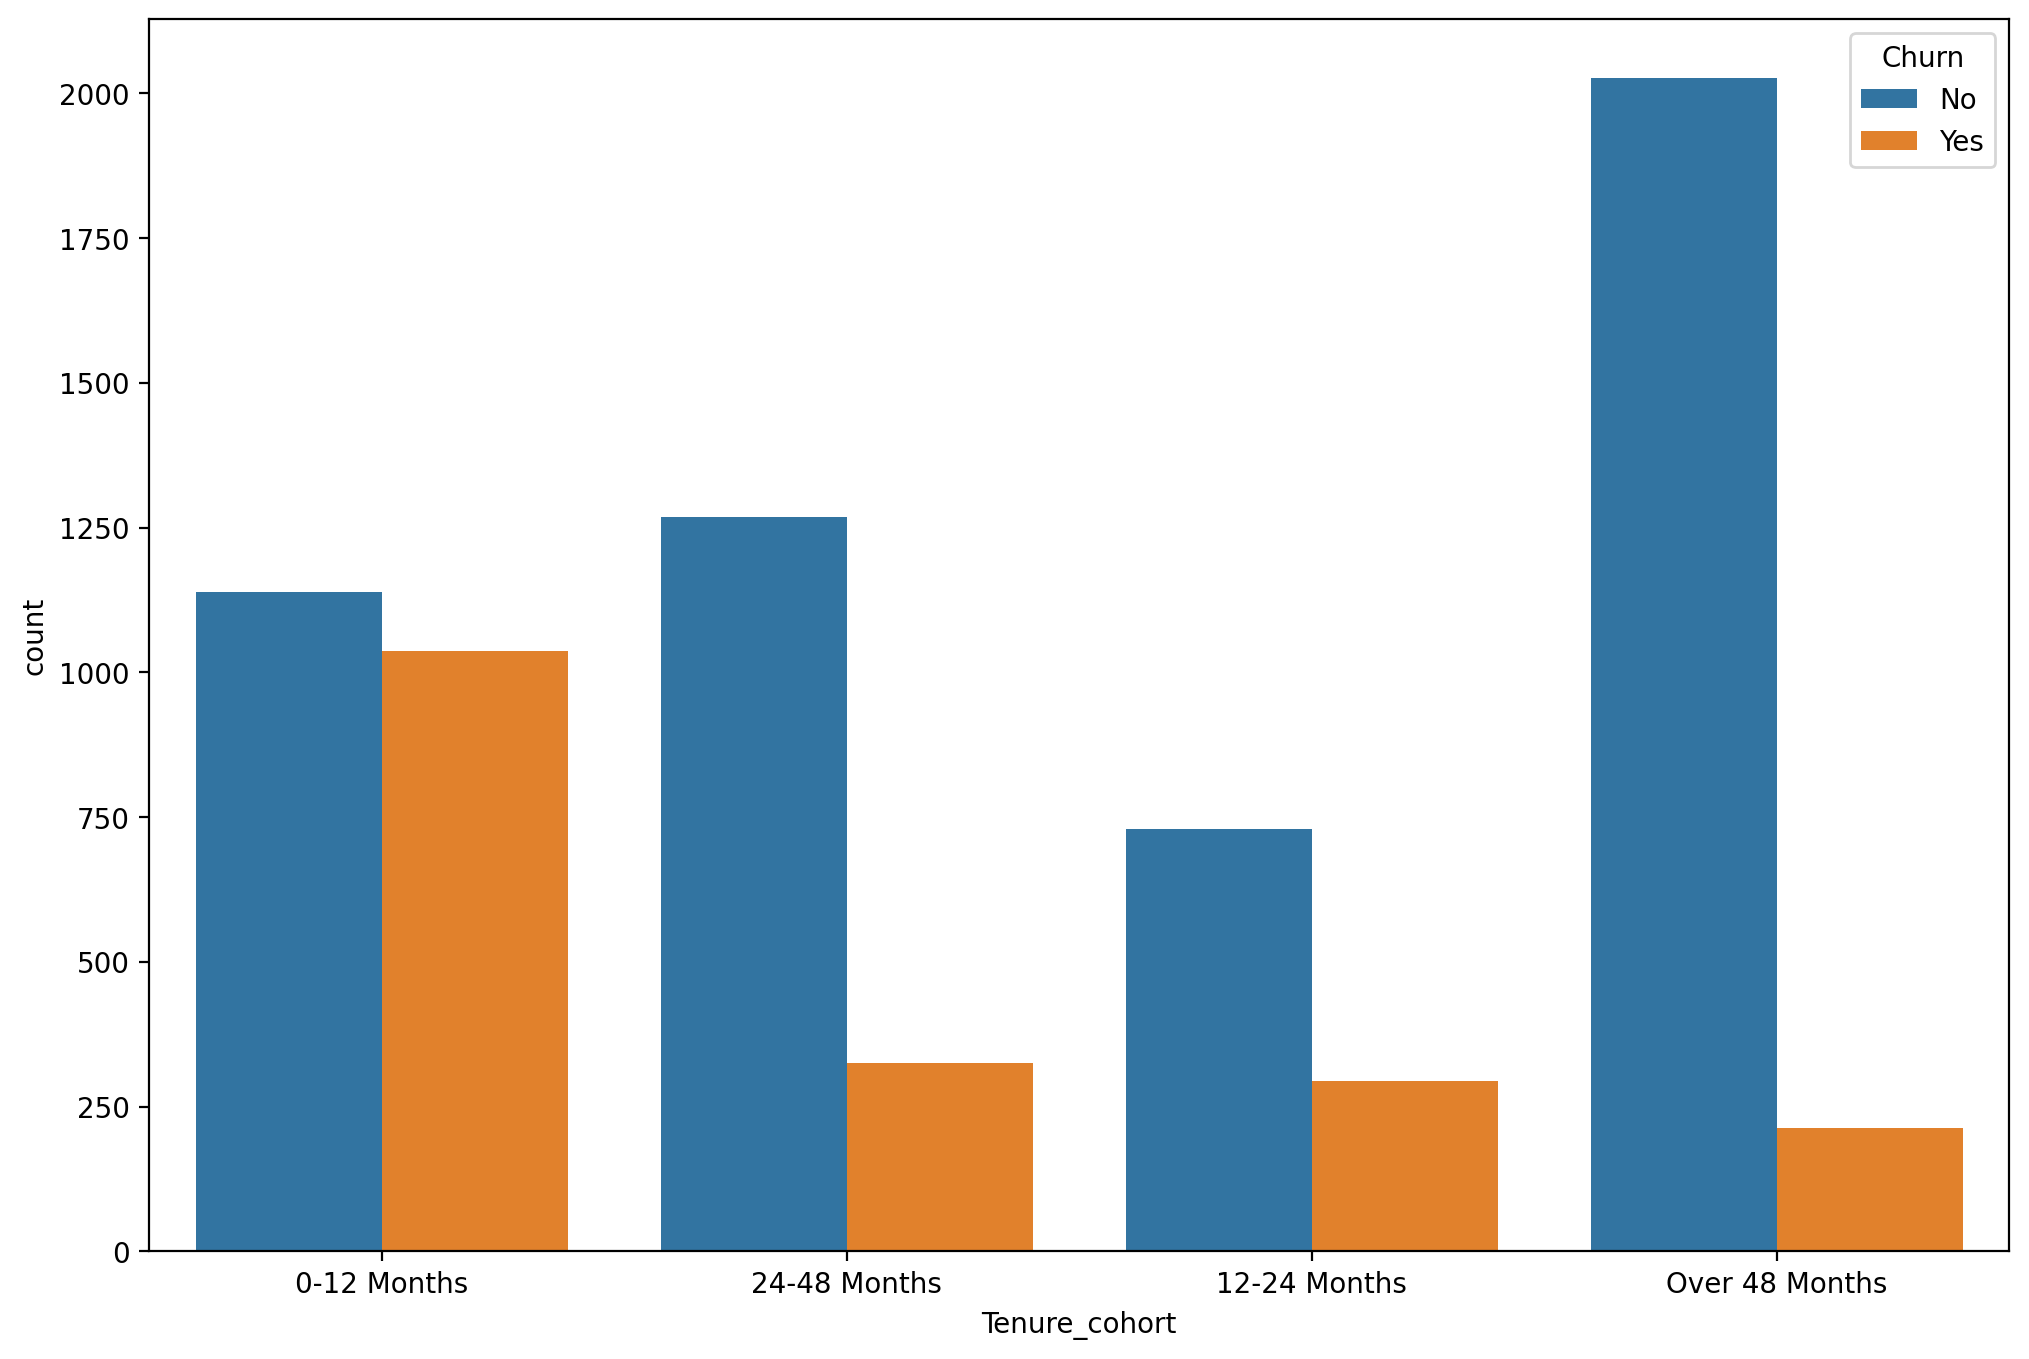

In [36]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(x='Tenure_cohort', data=df, hue='Churn')

### Grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.

<Figure size 2400x1600 with 0 Axes>

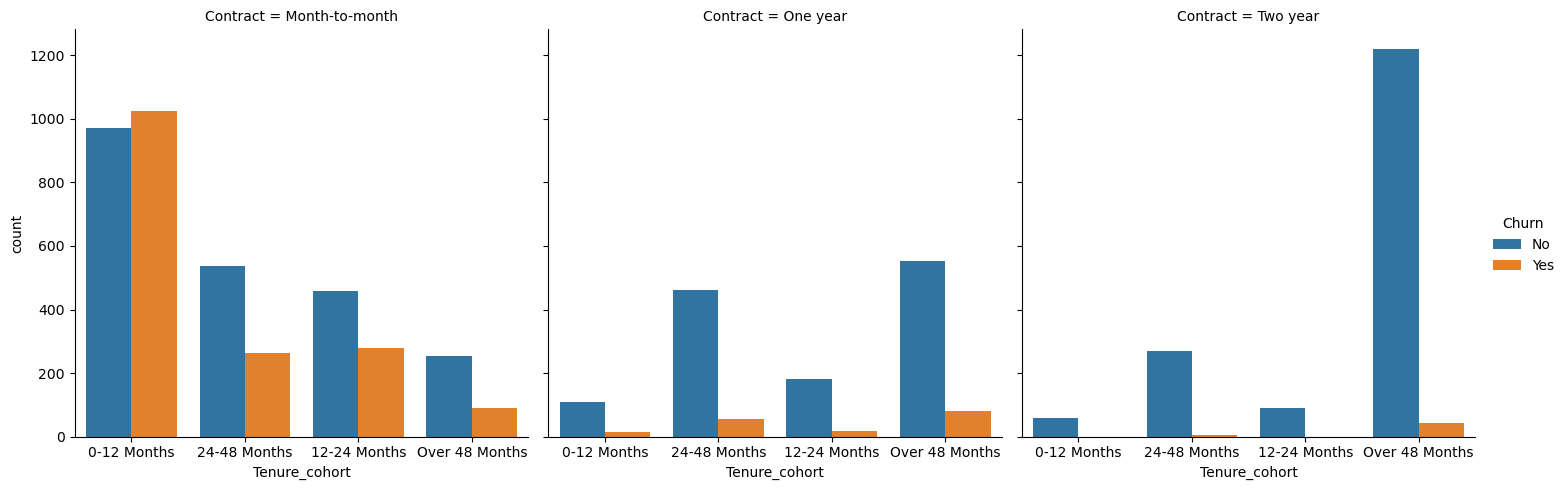

In [37]:
plt.figure(figsize=(12,8), dpi=200)
sns.catplot(x='Tenure_cohort', data=df, hue='Churn', kind='count', col='Contract')

## Predictive Modeling

In [38]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_cohort'],
      dtype='object')

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [40]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)

In [41]:
y = df['Churn']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

### Decision Tree

In [43]:
decision_tree_base_model = DecisionTreeClassifier()

In [44]:
decision_tree_base_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [45]:
max_depth = list(range(1,7))
max_leaf_nodes = list(range(2,10))
criterion = ['entropy', 'gini', 'log_loss']

In [46]:
param_grid = {
    "max_depth":max_depth,
    "max_leaf_nodes":max_leaf_nodes,
    "criterion":criterion
}

In [47]:
decision_tree_grid_model = GridSearchCV(decision_tree_base_model, param_grid, cv=5)

In [48]:
decision_tree_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]})

In [49]:
decision_tree_grid_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [50]:
final_decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, max_leaf_nodes=7)

In [51]:
final_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7)

In [52]:
final_decision_tree_model_predictions = final_decision_tree_model.predict(X_test)

In [53]:
print(classification_report(y_test, final_decision_tree_model_predictions))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



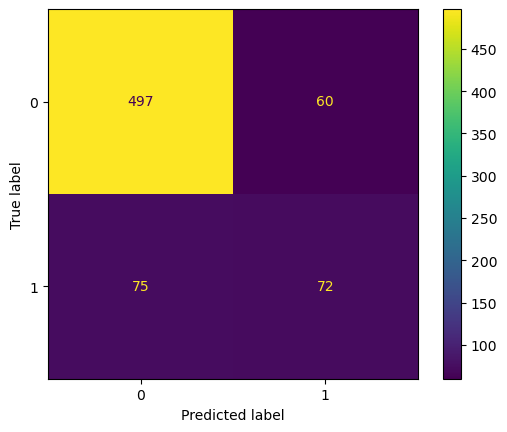

In [54]:
matrix = confusion_matrix(y_test, final_decision_tree_model_predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [55]:
decision_tree_important_features = pd.DataFrame(
    data=final_decision_tree_model.feature_importances_,
    index=X.columns,
    columns=['Feature Importance']
).sort_values("Feature Importance")

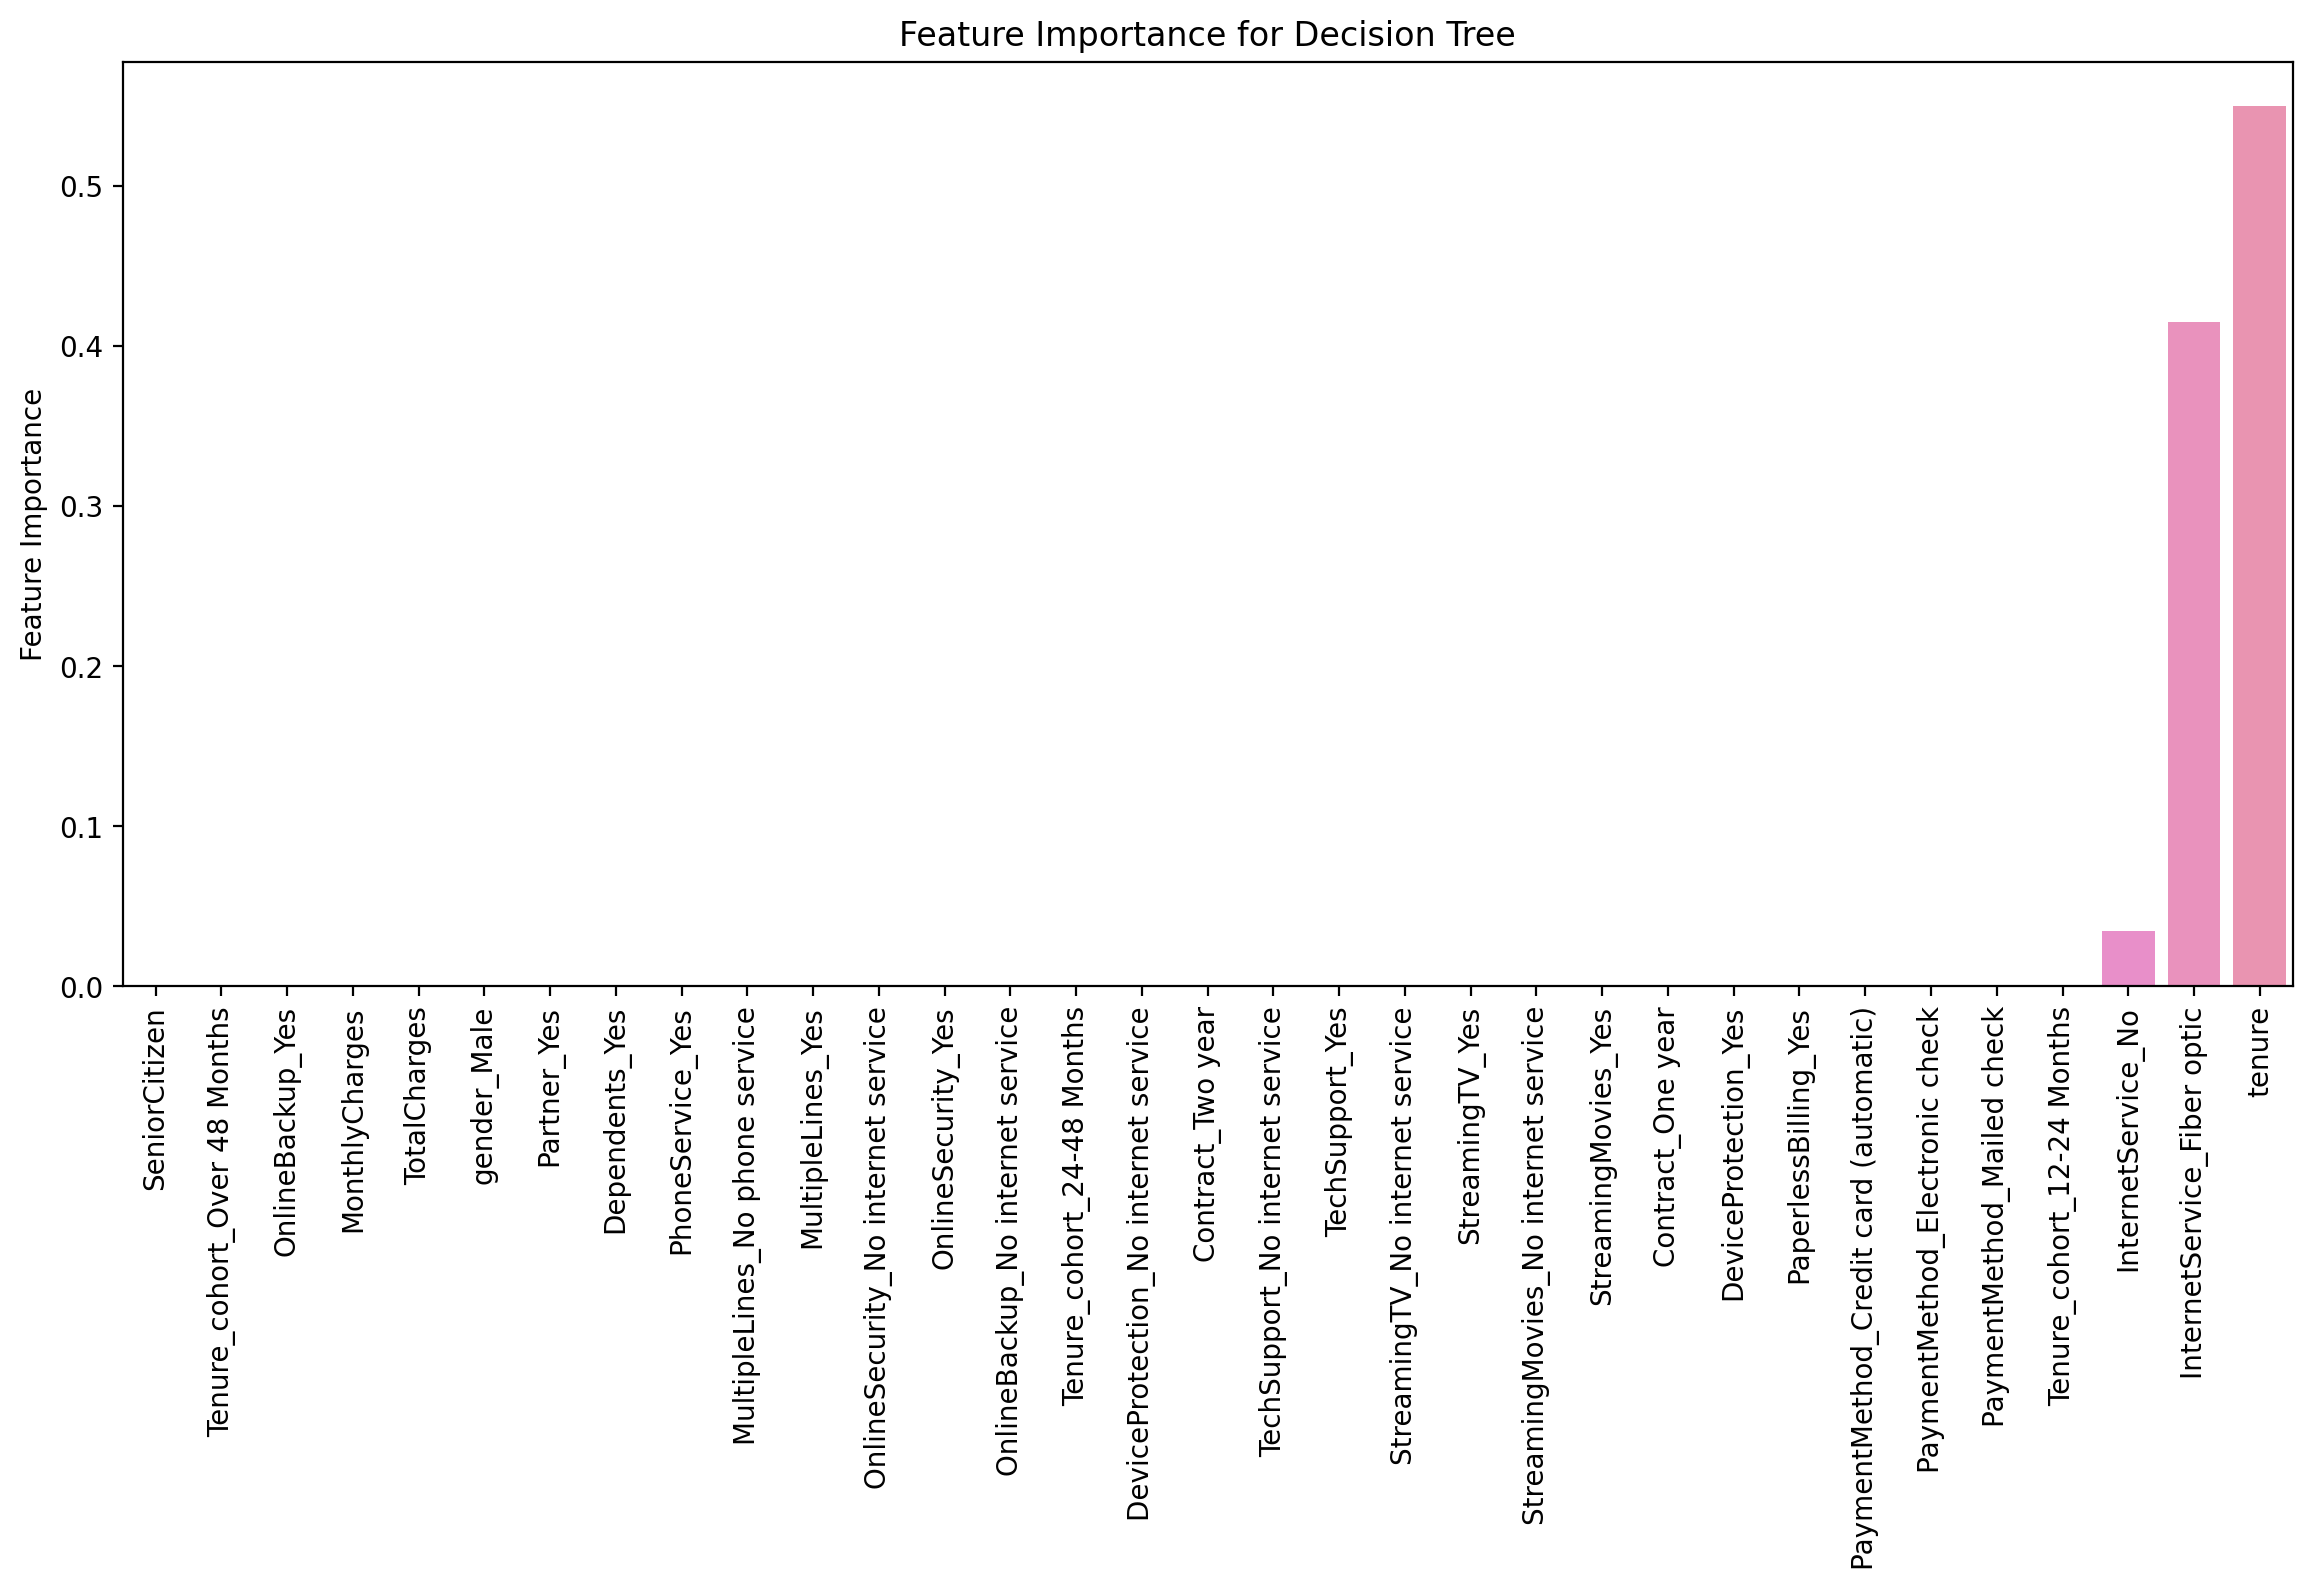

In [56]:
plt.figure(figsize=(14,6),dpi=200)

sns.barplot(
    data=decision_tree_important_features.sort_values('Feature Importance'),
    x=decision_tree_important_features.sort_values('Feature Importance').index,
    y='Feature Importance'
)

plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

### Random Forest

In [57]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [58]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
random_forest_classifier_predictions = random_forest_classifier.predict(X_test)

In [60]:
print(classification_report(y_test,random_forest_classifier_predictions))

              precision    recall  f1-score   support

          No       0.85      0.88      0.87       557
         Yes       0.48      0.44      0.46       147

    accuracy                           0.78       704
   macro avg       0.67      0.66      0.66       704
weighted avg       0.78      0.78      0.78       704



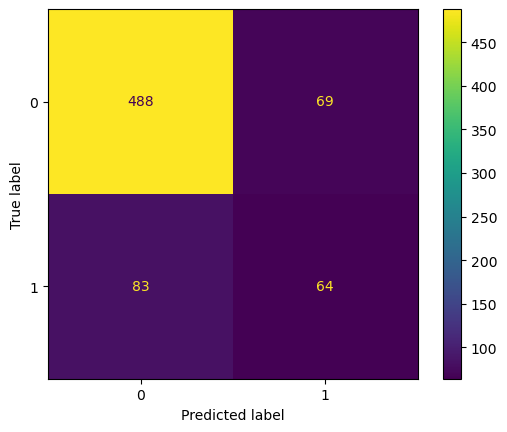

In [61]:
matrix = confusion_matrix(y_test, random_forest_classifier_predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

### Adaboost Classifier

In [62]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100)

In [63]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [64]:
adaboost_classifier_predictions = adaboost_classifier.predict(X_test)

In [65]:
print(classification_report(y_test,adaboost_classifier_predictions))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



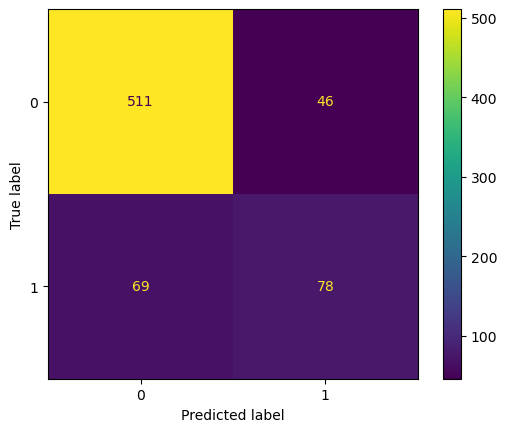

In [66]:
matrix = confusion_matrix(y_test, adaboost_classifier_predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

### Gradient Boosting Classifier

In [67]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100)

In [68]:
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
gradient_boosting_classifier_predictions = gradient_boosting_classifier.predict(X_test)

In [70]:
print(classification_report(y_test,gradient_boosting_classifier_predictions))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



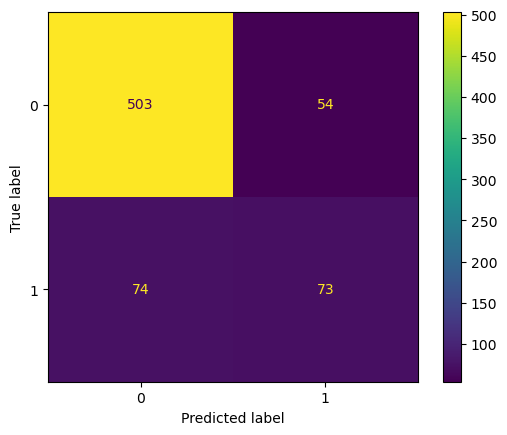

In [71]:
matrix = confusion_matrix(y_test, gradient_boosting_classifier_predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()